### Rolling predictions 

Comparing results on scikit tree & forest, prophet, SARIMA and craft on energy time series

We start by feeding the model 2 months of data, and ask them to predict 1 week

In [7]:
import pandas as pd
import numpy as np
import subprocess
import json
import ampds_benchmark_tools as abt
import pickle

In [2]:
import logging
import warnings
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [3]:
data = pd.read_csv('data/ampds_power_30T.csv')
data.index = pd.to_datetime(data.date, unit="s")
data = data.dropna().drop('date',1)
#Adding temperature information
temp = pd.read_csv('data/ampd_temp_30T.csv', parse_dates=['date'])
temp.index = pd.to_datetime(temp.date, unit='s')
temp = temp.drop('date',1)
data = data.merge(temp, left_index=True, right_index=True)
data.index.freq = '30T'

In [22]:
data.index.values[0], data.index.values[-1]

(numpy.datetime64('2012-04-01T07:00:00.000000000'),
 numpy.datetime64('2014-04-01T06:30:00.000000000'))

In [4]:
data.head()

,load,temp
date,,
2012-04-01 07:00:00,1947.400000,4.7
2012-04-01 07:30:00,1269.766667,4.7
2012-04-01 08:00:00,1645.300000,5.3
2012-04-01 08:30:00,845.666667,5.3
2012-04-01 09:00:00,1584.966667,5.9


In [4]:
print('{} semaines dans les données'.format(round((data.index[-1] - data.index[0]).days/7,2)))

104.14 semaines dans les données


Craft ai predictions for week n° 9


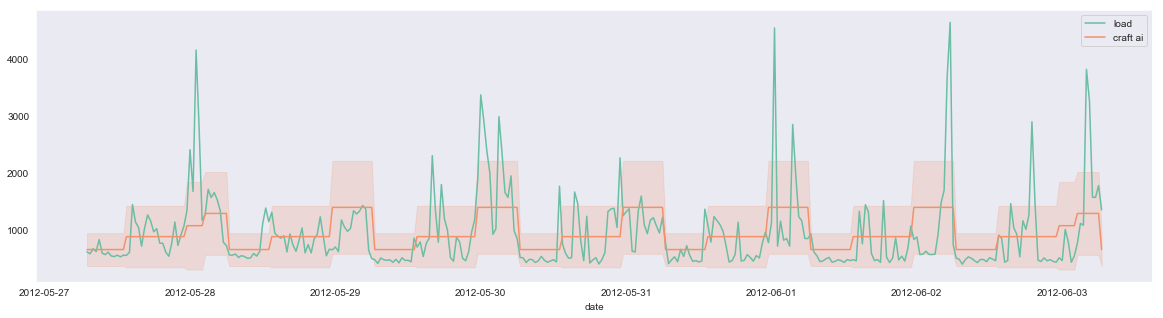

Model predictions for week n° 9


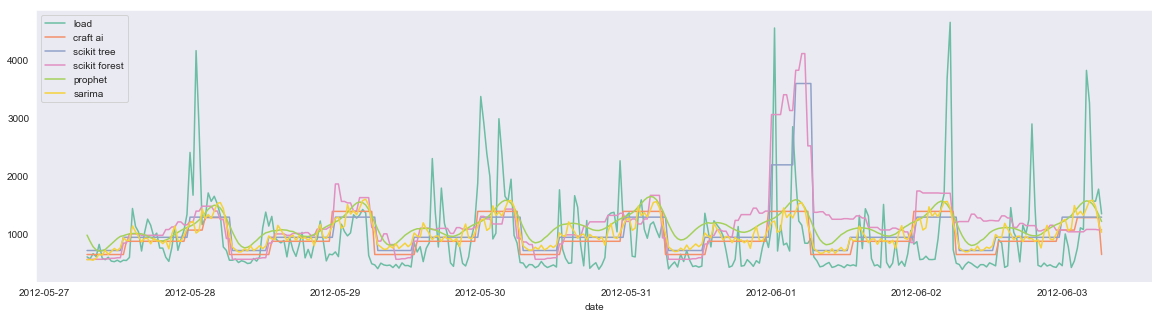

             ids    mae   mape   rmse        r2  week
0    scikit tree  445.0  55.79  675.0 -0.056460     9
1  scikit forest  532.0  72.94  772.0 -0.380193     9
2        prophet  474.0  67.46  627.0  0.089828     9
3   sarima model  398.0  51.23  587.0  0.203062     9
4       craft ai  375.0  44.14  579.0  0.224297     9
             ids    mae   mape   rmse        r2  week
0    scikit tree  433.0  43.72  690.0  0.134178    10
1  scikit forest  461.0  47.31  746.0 -0.010340    10
2        prophet  433.0  44.44  695.0  0.122384    10
3   sarima model  453.0  48.27  694.0  0.124514    10
4       craft ai  442.0  42.88  703.0  0.101070    10
             ids    mae   mape   rmse        r2  week
0    scikit tree  440.0  77.76  514.0 -0.717546    11
1  scikit forest  422.0  71.40  535.0 -0.862089    11
2        prophet  452.0  81.31  518.0 -0.749863    11
3   sarima model  447.0  78.77  520.0 -0.758926    11
4       craft ai  423.0  72.59  499.0 -0.618098    11
             ids    mae   ma

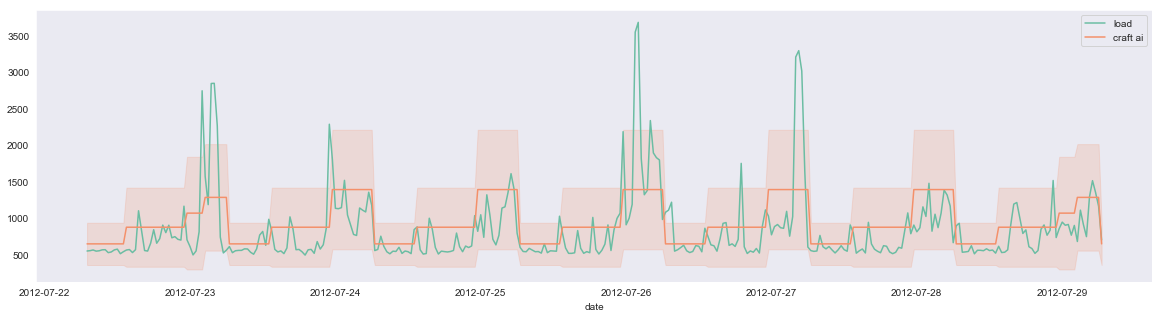

Model predictions for week n° 17


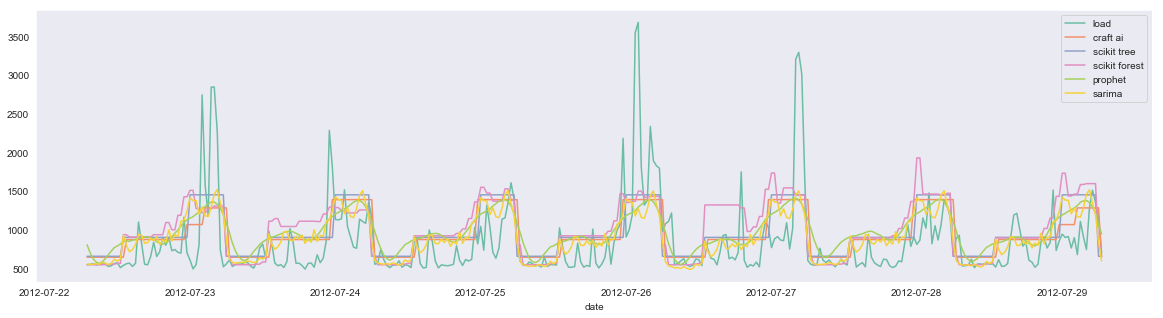

             ids    mae   mape   rmse        r2  week
0    scikit tree  300.0  37.15  432.0  0.223212    17
1  scikit forest  334.0  41.62  474.0  0.064333    17
2        prophet  295.0  37.57  423.0  0.253114    17
3   sarima model  255.0  29.58  407.0  0.310962    17
4       craft ai  282.0  34.33  420.0  0.265557    17
             ids    mae   mape   rmse        r2  week
0    scikit tree  333.0  33.08  615.0  0.119846    18
1  scikit forest  361.0  35.75  676.0 -0.063093    18
2        prophet  322.0  30.84  607.0  0.143693    18
3   sarima model  305.0  27.68  606.0  0.144769    18
4       craft ai  333.0  33.45  602.0  0.157717    18
             ids    mae   mape   rmse        r2  week
0    scikit tree  299.0  30.50  431.0  0.332760    19
1  scikit forest  315.0  33.56  437.0  0.313568    19
2        prophet  296.0  29.72  432.0  0.329235    19
3   sarima model  279.0  26.86  420.0  0.367732    19
4       craft ai  299.0  31.23  424.0  0.353115    19
             ids    mae   ma

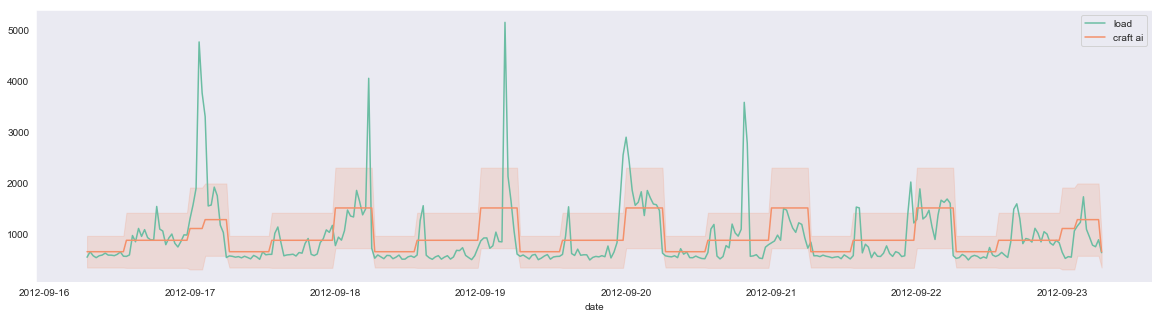

Model predictions for week n° 25


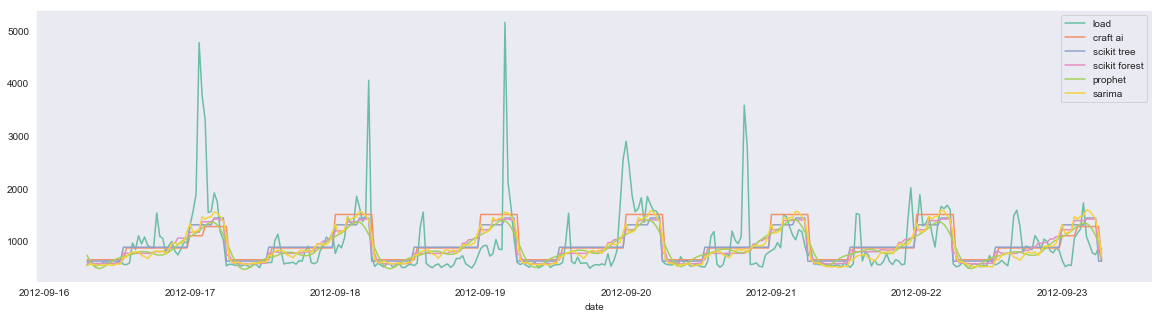

             ids    mae   mape   rmse        r2  week
0    scikit tree  282.0  29.82  508.0  0.303473    25
1  scikit forest  271.0  27.04  509.0  0.301024    25
2        prophet  287.0  29.18  519.0  0.273298    25
3   sarima model  268.0  26.65  504.0  0.313404    25
4       craft ai  300.0  32.31  526.0  0.251315    25
             ids    mae   mape   rmse        r2  week
0    scikit tree  311.0  35.16  521.0  0.194072    26
1  scikit forest  303.0  33.06  520.0  0.195424    26
2        prophet  287.0  30.38  515.0  0.213527    26
3   sarima model  274.0  26.89  513.0  0.217663    26
4       craft ai  311.0  35.12  527.0  0.176674    26
             ids    mae   mape   rmse        r2  week
0    scikit tree  370.0  41.08  588.0  0.147143    27
1  scikit forest  364.0  39.93  579.0  0.173586    27
2        prophet  328.0  32.61  586.0  0.152346    27
3   sarima model  303.0  27.28  583.0  0.161125    27
4       craft ai  346.0  36.20  583.0  0.159884    27
             ids    mae   ma

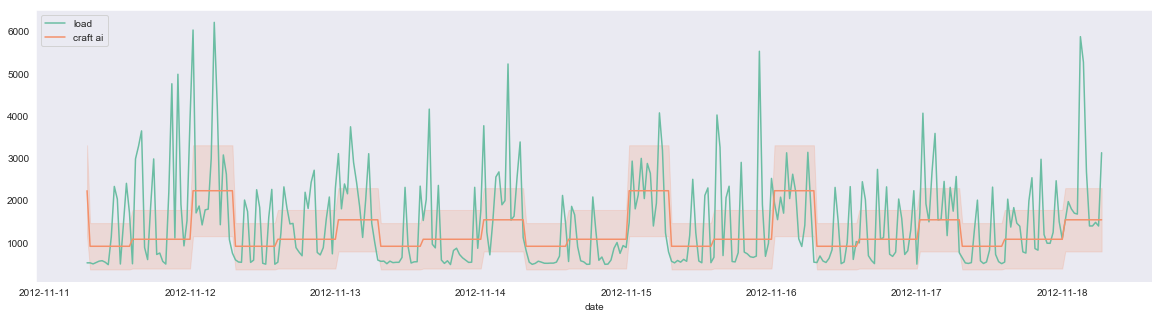

Model predictions for week n° 33


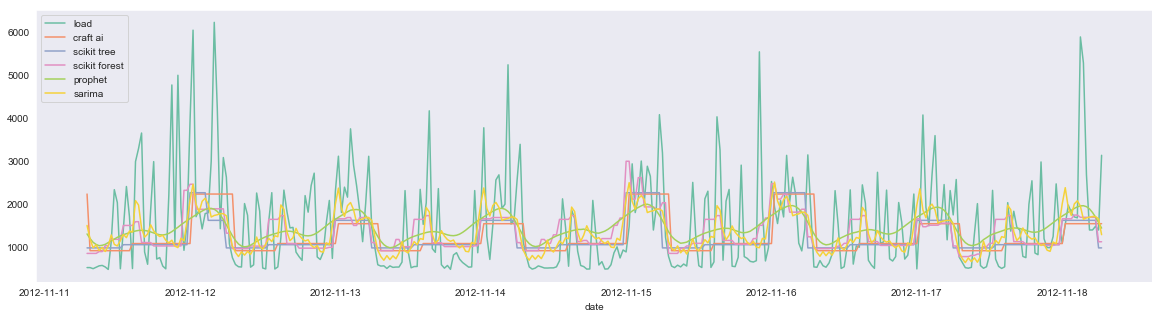

             ids    mae   mape    rmse        r2  week
0    scikit tree  724.0  52.42  1043.0  0.082945    33
1  scikit forest  714.0  56.87  1008.0  0.143798    33
2        prophet  742.0  65.71   992.0  0.170608    33
3   sarima model  672.0  52.25   963.0  0.218639    33
4       craft ai  723.0  52.89  1034.0  0.098436    33


C:\Users\Claire\Anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


             ids    mae   mape   rmse        r2  week
0    scikit tree  745.0  59.65  961.0  0.005459    34
1  scikit forest  711.0  58.13  903.0  0.122996    34
2        prophet  722.0  65.32  887.0  0.152478    34
3   sarima model  675.0  51.25  893.0  0.140806    34
4       craft ai  715.0  52.70  945.0  0.038853    34


C:\Users\Claire\Anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


             ids    mae   mape   rmse        r2  week
0    scikit tree  629.0  59.77  795.0  0.107257    35
1  scikit forest  718.0  70.62  871.0 -0.073839    35
2        prophet  723.0  83.21  816.0  0.058372    35
3   sarima model  653.0  66.30  799.0  0.098405    35
4       craft ai  641.0  59.32  800.0  0.095066    35
             ids    mae   mape    rmse        r2  week
0    scikit tree  723.0  51.19  1007.0  0.032371    36
1  scikit forest  715.0  47.81   993.0  0.058671    36
2        prophet  730.0  61.00   945.0  0.147537    36
3   sarima model  693.0  49.58   952.0  0.135182    36
4       craft ai  728.0  48.31  1003.0  0.039675    36


C:\Users\Claire\Anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


             ids    mae   mape   rmse        r2  week
0    scikit tree  598.0  70.02  714.0  0.104627    37
1  scikit forest  657.0  77.69  768.0 -0.035197    37
2        prophet  730.0  92.87  825.0 -0.195294    37
3   sarima model  624.0  74.33  752.0  0.008349    37
4       craft ai  550.0  59.73  700.0  0.139827    37
             ids    mae   mape   rmse        r2  week
0    scikit tree  602.0  60.25  859.0  0.144643    38
1  scikit forest  549.0  52.10  846.0  0.169151    38
2        prophet  619.0  67.16  858.0  0.146641    38
3   sarima model  585.0  58.88  857.0  0.148746    38
4       craft ai  564.0  53.52  848.0  0.165974    38
             ids    mae   mape   rmse        r2  week
0    scikit tree  611.0  68.44  782.0  0.134820    39
1  scikit forest  562.0  59.89  760.0  0.184169    39
2        prophet  613.0  71.56  778.0  0.144557    39
3   sarima model  553.0  60.57  744.0  0.217798    39
4       craft ai  596.0  64.37  784.0  0.131762    39
             ids    mae   ma

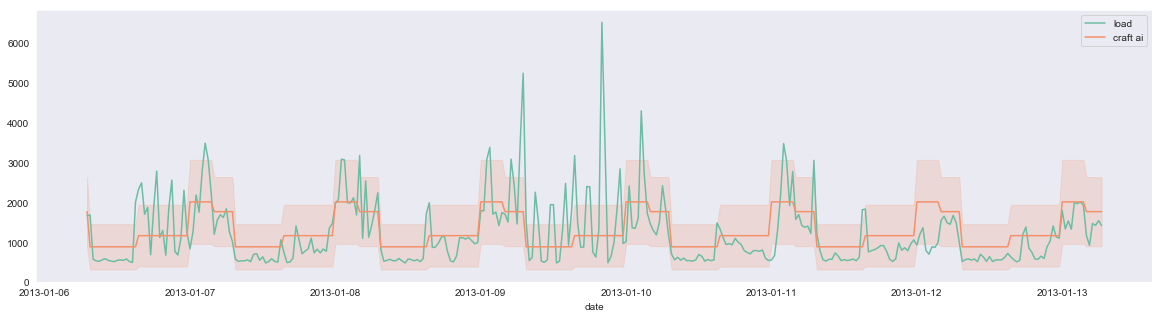

Model predictions for week n° 41


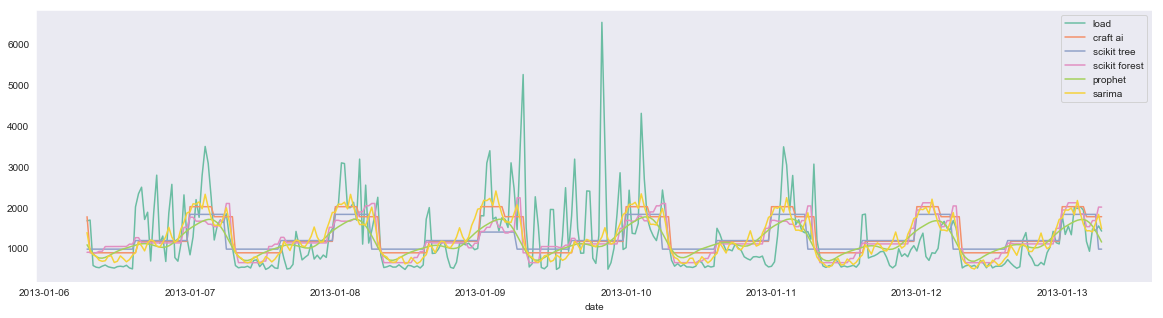

             ids    mae   mape   rmse        r2  week
0    scikit tree  536.0  52.21  743.0  0.167975    41
1  scikit forest  473.0  41.82  725.0  0.209065    41
2        prophet  464.0  41.52  715.0  0.231084    41
3   sarima model  435.0  37.58  682.0  0.298893    41
4       craft ai  487.0  47.23  690.0  0.282702    41
             ids    mae   mape   rmse        r2  week
0    scikit tree  480.0  47.67  697.0  0.235388    42
1  scikit forest  366.0  28.53  667.0  0.298985    42
2        prophet  410.0  35.15  682.0  0.267227    42
3   sarima model  361.0  28.42  653.0  0.328540    42
4       craft ai  444.0  43.30  665.0  0.303485    42
             ids    mae   mape   rmse        r2  week
0    scikit tree  570.0  48.75  779.0  0.130087    43
1  scikit forest  520.0  41.42  756.0  0.181738    43
2        prophet  523.0  38.09  785.0  0.117240    43
3   sarima model  517.0  39.94  765.0  0.161202    43
4       craft ai  544.0  45.32  759.0  0.173408    43
             ids    mae   ma

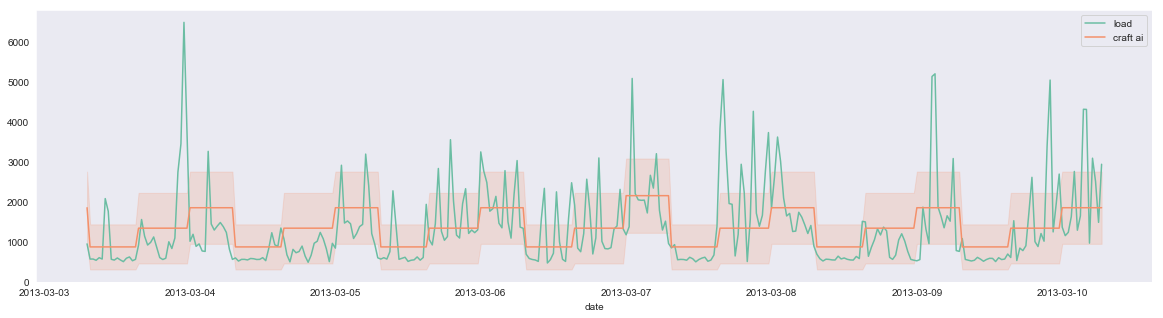

Model predictions for week n° 49


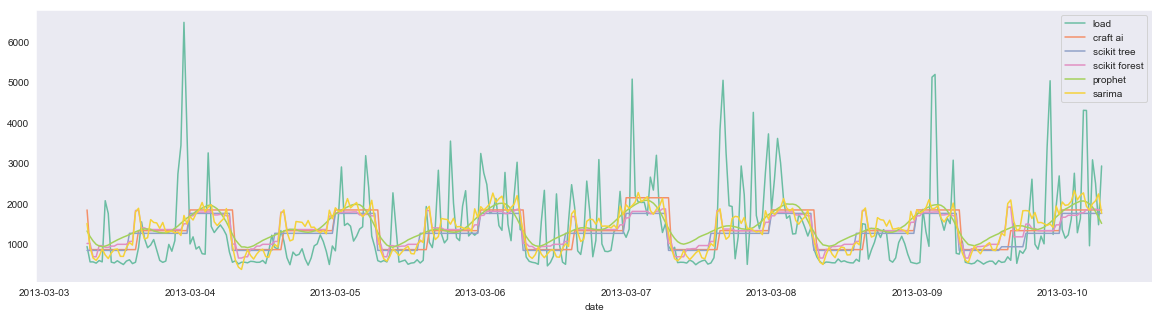

             ids    mae   mape   rmse        r2  week
0    scikit tree  580.0  47.54  880.0  0.197796    49
1  scikit forest  605.0  53.31  871.0  0.213766    49
2        prophet  651.0  61.92  875.0  0.205673    49
3   sarima model  596.0  51.29  866.0  0.222843    49
4       craft ai  610.0  51.78  883.0  0.192128    49
             ids    mae   mape   rmse        r2  week
0    scikit tree  580.0  42.60  817.0  0.003863    50
1  scikit forest  638.0  51.68  847.0 -0.069314    50
2        prophet  638.0  57.54  793.0  0.062038    50
3   sarima model  688.0  59.98  863.0 -0.110270    50
4       craft ai  624.0  50.64  843.0 -0.060821    50
             ids    mae   mape   rmse        r2  week
0    scikit tree  515.0  51.01  757.0  0.229920    51
1  scikit forest  541.0  56.12  765.0  0.214302    51
2        prophet  591.0  64.59  782.0  0.177893    51
3   sarima model  521.0  51.39  760.0  0.223461    51
4       craft ai  545.0  57.04  773.0  0.197682    51
             ids    mae   ma

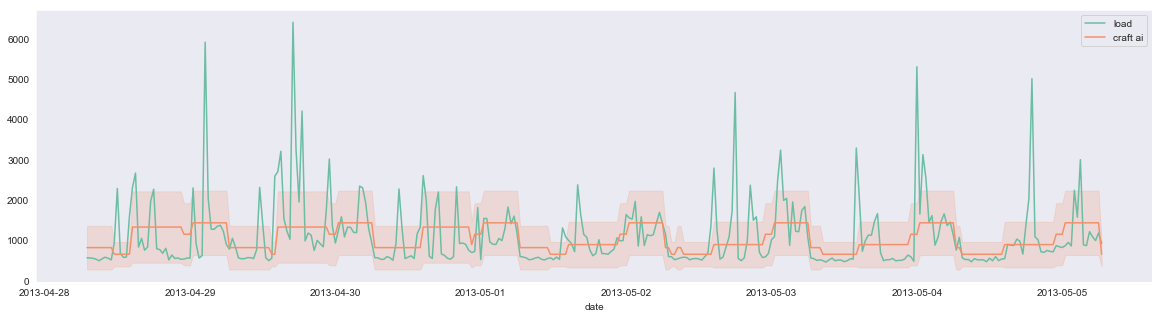

Model predictions for week n° 57


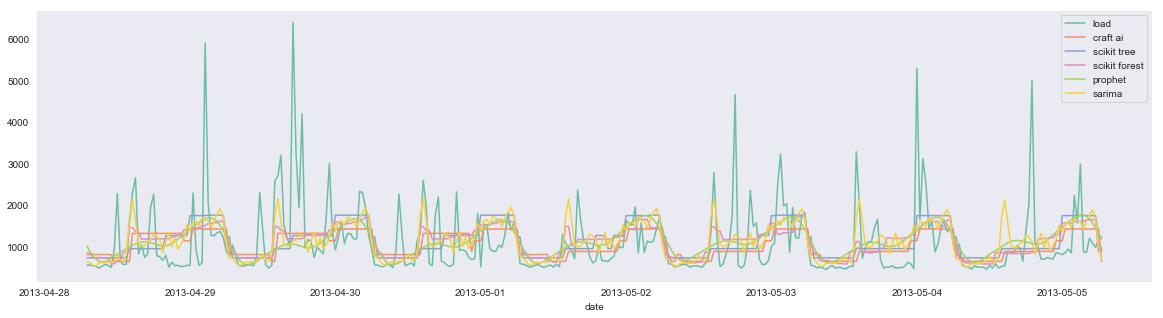

             ids    mae   mape   rmse        r2  week
0    scikit tree  510.0  47.82  795.0  0.093743    57
1  scikit forest  493.0  47.40  778.0  0.131308    57
2        prophet  497.0  47.19  792.0  0.100095    57
3   sarima model  455.0  42.72  752.0  0.189223    57
4       craft ai  468.0  41.83  781.0  0.125568    57


C:\Users\Claire\Anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


             ids    mae   mape   rmse        r2  week
0    scikit tree  357.0  44.43  477.0  0.008634    58
1  scikit forest  290.0  33.99  430.0  0.195166    58
2        prophet  388.0  50.21  492.0 -0.052476    58
3   sarima model  365.0  45.04  502.0 -0.095595    58
4       craft ai  284.0  33.03  421.0  0.229252    58
             ids    mae   mape   rmse        r2  week
0    scikit tree  353.0  39.34  605.0  0.215509    59
1  scikit forest  328.0  34.61  595.0  0.240855    59
2        prophet  336.0  35.92  601.0  0.226326    59
3   sarima model  358.0  38.68  630.0  0.149929    59
4       craft ai  342.0  37.05  610.0  0.202649    59


C:\Users\Claire\Anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


             ids    mae   mape   rmse        r2  week
0    scikit tree  399.0  44.09  625.0  0.139908    60
1  scikit forest  372.0  39.06  615.0  0.165601    60
2        prophet  346.0  33.21  610.0  0.180362    60
3   sarima model  354.0  36.87  597.0  0.213311    60
4       craft ai  346.0  33.99  610.0  0.180491    60
             ids    mae   mape   rmse        r2  week
0    scikit tree  382.0  34.96  631.0  0.164944    61
1  scikit forest  347.0  28.98  615.0  0.206642    61
2        prophet  353.0  27.99  645.0  0.127607    61
3   sarima model  350.0  29.67  621.0  0.191733    61
4       craft ai  381.0  33.33  645.0  0.127471    61
             ids    mae   mape   rmse        r2  week
0    scikit tree  313.0  33.32  551.0  0.216024    62
1  scikit forest  256.0  23.56  534.0  0.264223    62
2        prophet  284.0  27.58  543.0  0.237709    62
3   sarima model  291.0  28.47  548.0  0.223828    62
4       craft ai  299.0  30.89  542.0  0.240211    62
             ids    mae   ma

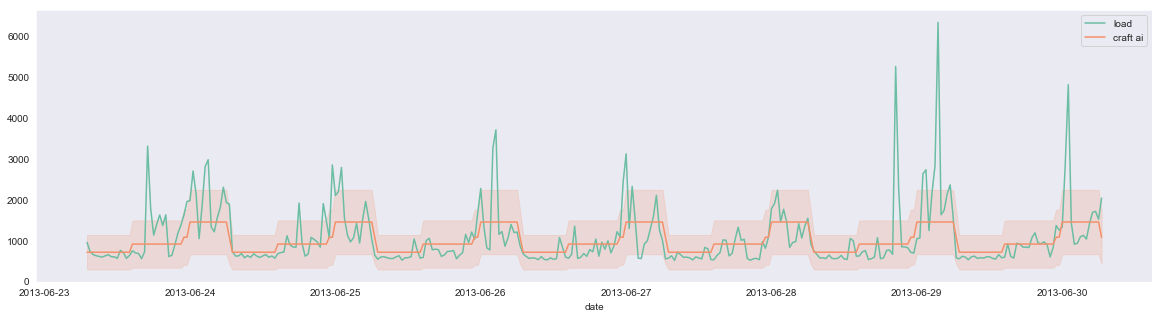

Model predictions for week n° 65


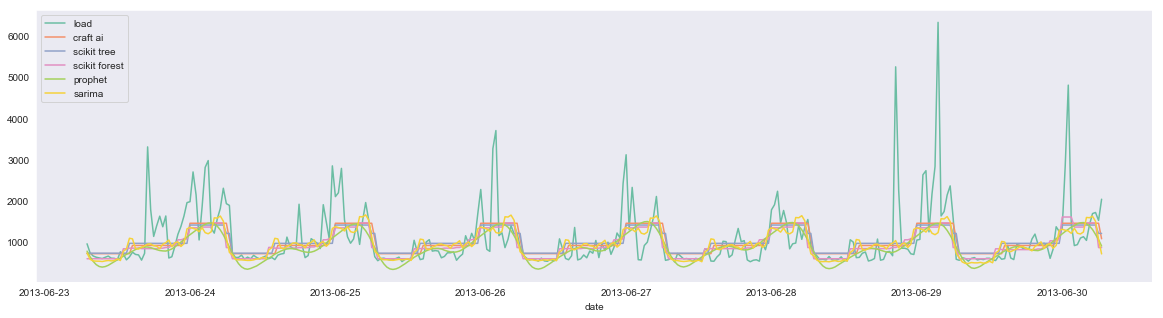

             ids    mae   mape   rmse        r2  week
0    scikit tree  354.0  31.53  621.0  0.269684    65
1  scikit forest  320.0  24.55  619.0  0.272842    65
2        prophet  347.0  27.63  640.0  0.224100    65
3   sarima model  336.0  27.21  633.0  0.240295    65
4       craft ai  336.0  28.86  609.0  0.297537    65
             ids    mae   mape   rmse        r2  week
0    scikit tree  374.0  32.29  666.0  0.165240    66
1  scikit forest  355.0  27.35  669.0  0.157338    66
2        prophet  360.0  28.59  667.0  0.162603    66
3   sarima model  346.0  27.36  650.0  0.203734    66
4       craft ai  368.0  31.09  662.0  0.175484    66
             ids    mae   mape   rmse        r2  week
0    scikit tree  309.0  30.96  542.0  0.167632    67
1  scikit forest  274.0  24.21  536.0  0.184317    67
2        prophet  288.0  26.60  540.0  0.172479    67
3   sarima model  306.0  29.20  543.0  0.164454    67
4       craft ai  316.0  31.02  548.0  0.150315    67
             ids    mae   ma

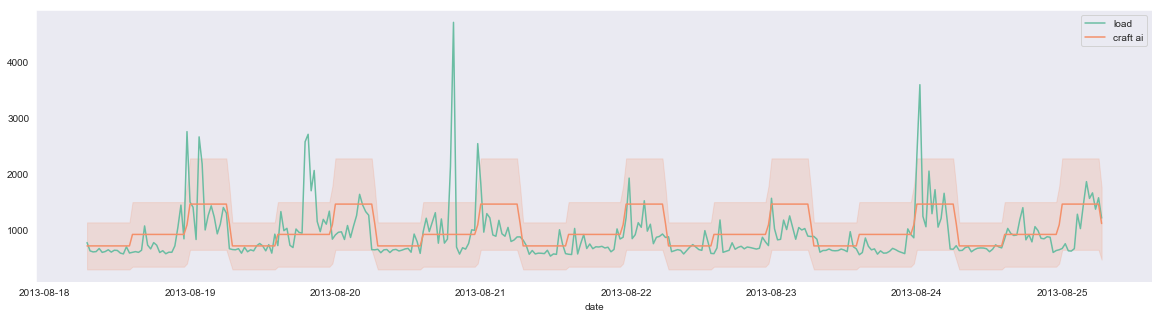

Model predictions for week n° 73


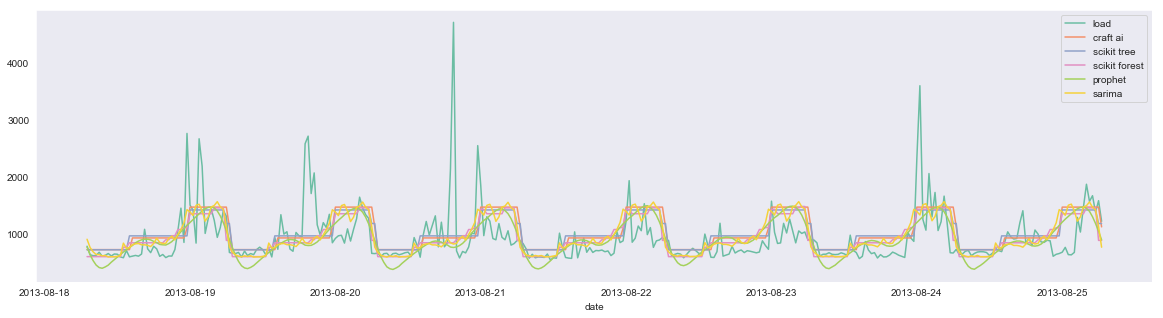

             ids    mae   mape   rmse        r2  week
0    scikit tree  272.0  29.78  431.0  0.118406    73
1  scikit forest  250.0  25.61  423.0  0.149407    73
2        prophet  266.0  27.85  432.0  0.114309    73
3   sarima model  255.0  26.28  431.0  0.117534    73
4       craft ai  275.0  29.62  436.0  0.097992    73
             ids    mae   mape   rmse        r2  week
0    scikit tree  331.0  32.86  554.0  0.170799    74
1  scikit forest  334.0  31.80  554.0  0.170602    74
2        prophet  348.0  33.13  562.0  0.145437    74
3   sarima model  327.0  30.22  558.0  0.158985    74
4       craft ai  335.0  33.39  552.0  0.176706    74
             ids    mae   mape   rmse        r2  week
0    scikit tree  311.0  29.89  599.0  0.140096    75
1  scikit forest  292.0  26.33  591.0  0.161544    75
2        prophet  316.0  29.33  595.0  0.152129    75
3   sarima model  288.0  25.74  585.0  0.180594    75
4       craft ai  316.0  30.25  598.0  0.143723    75
             ids    mae   ma

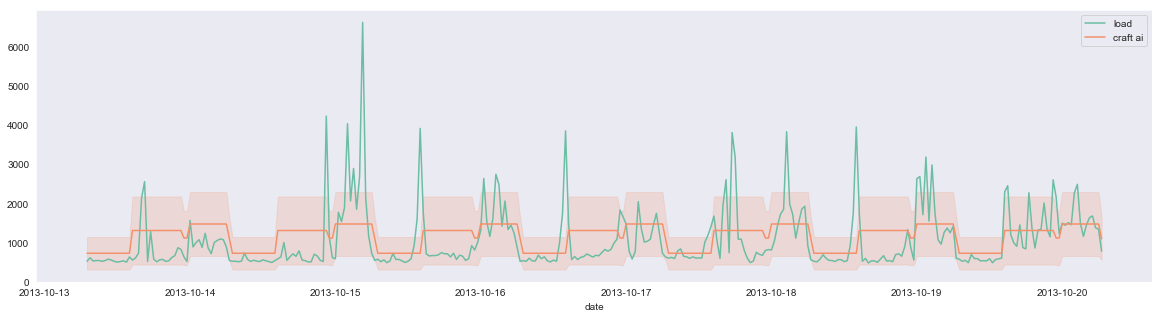

Model predictions for week n° 81


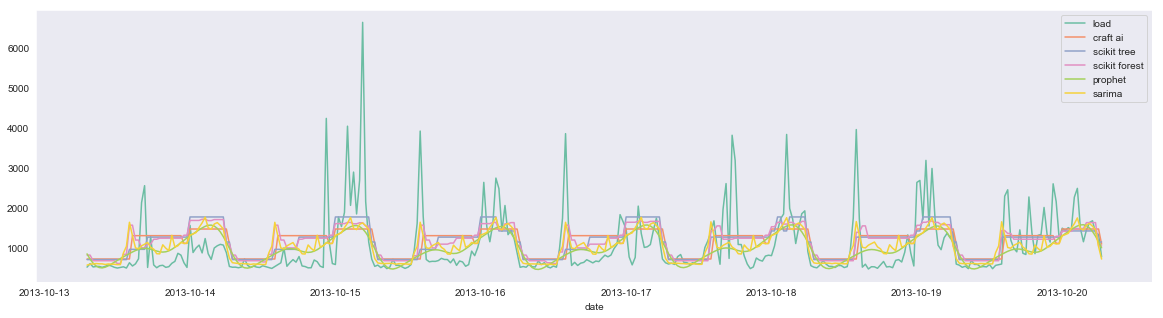

             ids    mae   mape   rmse        r2  week
0    scikit tree  482.0  52.33  706.0  0.181590    81
1  scikit forest  472.0  51.91  690.0  0.217508    81
2        prophet  405.0  37.20  687.0  0.224786    81
3   sarima model  396.0  38.47  648.0  0.309682    81
4       craft ai  496.0  54.38  732.0  0.120681    81
             ids    mae   mape   rmse        r2  week
0    scikit tree  450.0  42.85  692.0  0.189877    82
1  scikit forest  419.0  38.51  666.0  0.249117    82
2        prophet  380.0  30.18  690.0  0.194498    82
3   sarima model  348.0  27.85  627.0  0.335804    82
4       craft ai  457.0  43.71  715.0  0.134168    82
             ids    mae   mape   rmse        r2  week
0    scikit tree  527.0  40.73  875.0  0.128589    83
1  scikit forest  514.0  38.87  863.0  0.152412    83
2        prophet  483.0  32.63  892.0  0.093948    83
3   sarima model  447.0  30.02  830.0  0.215211    83
4       craft ai  565.0  43.81  951.0 -0.030260    83
             ids    mae   ma

C:\Users\Claire\Anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Craft ai predictions for week n° 89


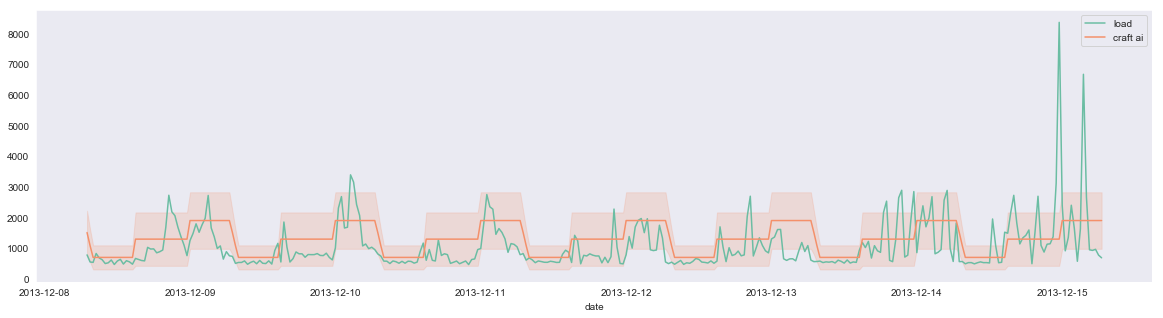

Model predictions for week n° 89


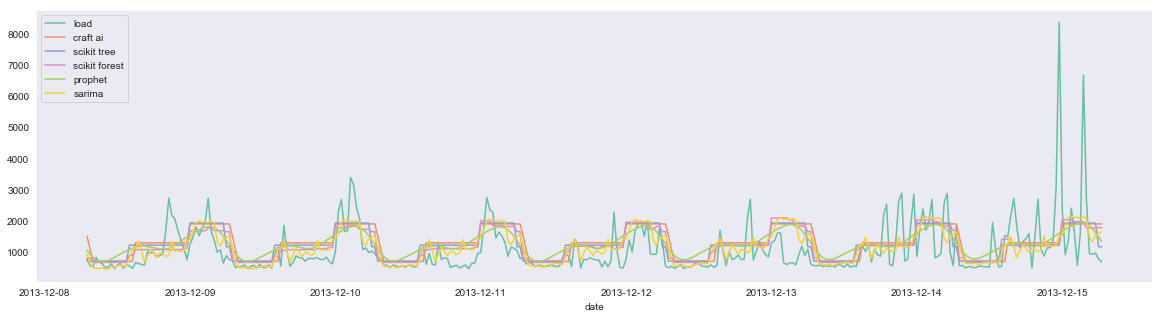

             ids    mae   mape   rmse        r2  week
0    scikit tree  482.0  51.93  743.0  0.148558    89
1  scikit forest  462.0  48.59  740.0  0.156717    89
2        prophet  501.0  57.56  726.0  0.189016    89
3   sarima model  415.0  41.72  709.0  0.226616    89
4       craft ai  531.0  59.14  778.0  0.068281    89


C:\Users\Claire\Anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


             ids    mae   mape   rmse        r2  week
0    scikit tree  534.0  62.46  738.0  0.060075    90
1  scikit forest  513.0  58.45  717.0  0.112030    90
2        prophet  557.0  68.31  731.0  0.076408    90
3   sarima model  471.0  51.34  712.0  0.123760    90
4       craft ai  564.0  66.69  747.0  0.035518    90


C:\Users\Claire\Anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


             ids    mae   mape   rmse        r2  week
0    scikit tree  544.0  45.05  835.0  0.222243    91
1  scikit forest  533.0  43.65  827.0  0.237121    91
2        prophet  570.0  51.78  834.0  0.224101    91
3   sarima model  513.0  38.25  841.0  0.211037    91
4       craft ai  573.0  49.31  833.0  0.226128    91


C:\Users\Claire\Anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


             ids    mae   mape   rmse        r2  week
0    scikit tree  612.0  44.72  921.0  0.195594    92
1  scikit forest  608.0  46.10  904.0  0.225532    92
2        prophet  645.0  53.66  921.0  0.196299    92
3   sarima model  568.0  39.69  894.0  0.242369    92
4       craft ai  626.0  48.25  906.0  0.221847    92
             ids    mae   mape   rmse        r2  week
0    scikit tree  551.0  38.82  845.0  0.241546    93
1  scikit forest  549.0  41.64  800.0  0.318894    93
2        prophet  598.0  50.74  829.0  0.269941    93
3   sarima model  545.0  39.82  806.0  0.308973    93
4       craft ai  587.0  44.97  836.0  0.256316    93


C:\Users\Claire\Anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


             ids    mae   mape   rmse        r2  week
0    scikit tree  508.0  43.29  801.0  0.204917    94
1  scikit forest  566.0  51.45  816.0  0.175659    94
2        prophet  608.0  62.87  816.0  0.175686    94
3   sarima model  557.0  51.14  798.0  0.210312    94
4       craft ai  546.0  48.36  801.0  0.204748    94


C:\Users\Claire\Anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


             ids    mae   mape   rmse        r2  week
0    scikit tree  445.0  45.12  662.0  0.301403    95
1  scikit forest  465.0  47.60  675.0  0.275052    95
2        prophet  547.0  63.65  713.0  0.190806    95
3   sarima model  444.0  44.30  669.0  0.288061    95
4       craft ai  491.0  50.92  681.0  0.261201    95


C:\Users\Claire\Anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


             ids    mae   mape   rmse        r2  week
0    scikit tree  514.0  45.23  772.0  0.228974    96
1  scikit forest  527.0  47.80  762.0  0.248269    96
2        prophet  591.0  60.49  790.0  0.192310    96
3   sarima model  494.0  42.82  750.0  0.271575    96
4       craft ai  559.0  51.36  788.0  0.196437    96
Craft ai predictions for week n° 97


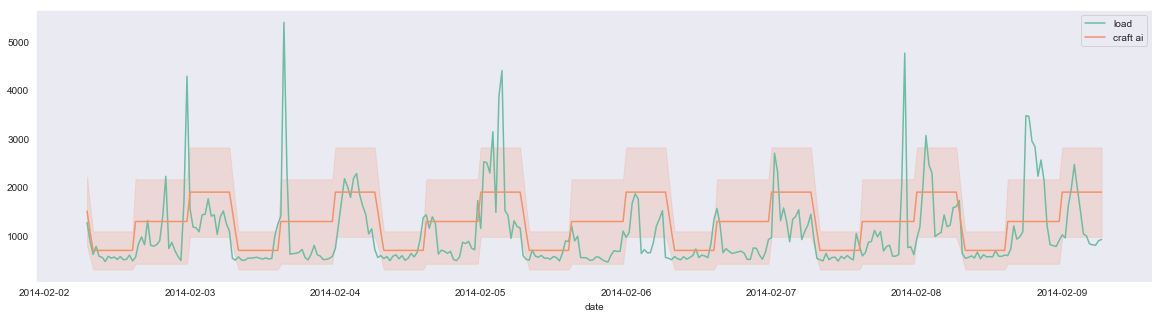

Model predictions for week n° 97


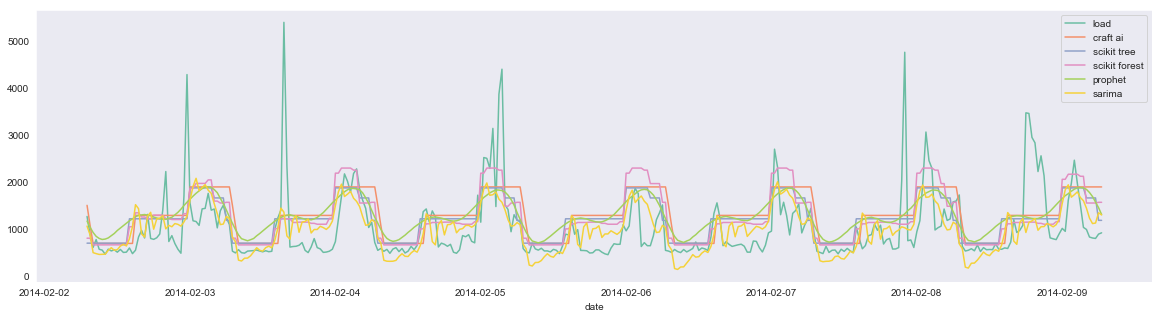

             ids    mae   mape   rmse        r2  week
0    scikit tree  456.0  51.54  654.0  0.172320    97
1  scikit forest  452.0  50.00  671.0  0.130202    97
2        prophet  513.0  62.39  676.0  0.116751    97
3   sarima model  391.0  40.33  618.0  0.262266    97
4       craft ai  523.0  60.33  705.0  0.039987    97
             ids    mae   mape   rmse        r2  week
0    scikit tree  489.0  44.27  739.0  0.324117    98
1  scikit forest  512.0  48.09  746.0  0.311706    98
2        prophet  561.0  58.45  769.0  0.268405    98
3   sarima model  523.0  52.02  746.0  0.311927    98
4       craft ai  542.0  51.31  765.0  0.274964    98
             ids    mae   mape   rmse        r2  week
0    scikit tree  486.0  47.90  693.0  0.161608    99
1  scikit forest  501.0  49.90  703.0  0.135081    99
2        prophet  544.0  59.45  708.0  0.124201    99
3   sarima model  490.0  47.78  698.0  0.147406    99
4       craft ai  523.0  54.23  698.0  0.148053    99


C:\Users\Claire\Anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


             ids    mae   mape   rmse        r2  week
0    scikit tree  479.0  51.47  716.0  0.162211   100
1  scikit forest  467.0  49.15  722.0  0.146480   100
2        prophet  520.0  59.31  736.0  0.114373   100
3   sarima model  440.0  44.20  713.0  0.168032   100
4       craft ai  551.0  60.83  761.0  0.052865   100
             ids    mae   mape   rmse        r2  week
0    scikit tree  502.0  43.10  734.0  0.228250   101
1  scikit forest  511.0  44.70  730.0  0.236121   101
2        prophet  535.0  50.91  734.0  0.227003   101
3   sarima model  509.0  44.90  741.0  0.213476   101
4       craft ai  549.0  50.53  744.0  0.205805   101
             ids    mae   mape   rmse        r2  week
0    scikit tree  523.0  49.17  722.0  0.133068   102
1  scikit forest  528.0  50.88  702.0  0.180651   102
2        prophet  547.0  56.09  708.0  0.165450   102
3   sarima model  565.0  57.13  731.0  0.110430   102
4       craft ai  607.0  62.29  792.0 -0.044221   102


C:\Users\Claire\Anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


             ids    mae   mape   rmse        r2  week
0    scikit tree  502.0  46.21  732.0  0.220703   103
1  scikit forest  497.0  46.44  726.0  0.234454   103
2        prophet  518.0  50.05  736.0  0.212329   103
3   sarima model  484.0  43.25  734.0  0.216326   103
4       craft ai  576.0  56.55  786.0  0.102796   103
             ids    mae   mape   rmse        r2  week
0    scikit tree  535.0  41.35  830.0  0.152550   104
1  scikit forest  535.0  41.72  817.0  0.178100   104
2        prophet  561.0  46.31  827.0  0.157941   104
3   sarima model  539.0  42.24  819.0  0.174734   104
4       craft ai  621.0  52.55  897.0  0.010138   104


ValueError: Provided exogenous values are not of the appropriate shape. Required (336, 1), got (96, 1).

In [8]:
week_unit = 7*24*2 #nombre de demi-heures dans une semaine
week_index = 8
max_week_index = data.shape[0]/(7*24*2)
scores = []
while week_index < max_week_index:
    last_train_index = week_index * week_unit
    last_test_index = (week_index +1) * week_unit
    
    #compute craft ai preds 
    craft_preds = abt.get_craft_preds(stop_train=last_train_index, start_pred=last_train_index, stop_pred=last_test_index, node_file = "load_benchmark_ampds")
    crp = craft_preds['predictedLoad']
    #compute other models' preds  
    data_train, data_test = abt.split_data(data, last_train_index , last_test_index)
    sk_tree_preds = abt.get_scikit_preds(data_train, data_test)
    forest_preds = abt.get_forest_preds(data_train, data_test)
    prophet_preds = abt.get_prophet_preds(data_train, data_test)
    try:
        sarima_preds = abt.get_sarima_preds(data_train, data_test,week_unit, max_feed=3000)
    except MemoryError:
        print("Memory error for sarima preds on week", week_index)
        sarima_preds = []
        continue
        
    #get scores for the current week
    frame = abt.get_models_scores(data_test=data_test,
                      predictions=[sk_tree_preds, forest_preds, prophet_preds, sarima_preds, crp], 
                      idx = ['scikit tree', 'scikit forest', 'prophet', 'sarima model', 'craft ai'])
    frame['week'] = week_index +1 
    scores.append(frame)
    
    with open('scores.pickle', 'wb') as f:
        # Pickle the score array so that we can retrieve the scores if the prog fails
        pickle.dump(scores, f, pickle.HIGHEST_PROTOCOL)
    
    #once in a while, print our predictions to see how they compare to each other and to the real values
    if (week_index%8 ==0):
        std = craft_preds['standardDeviation']
        
        print("Craft ai predictions for week n° {}".format(week_index+1))
        abt.plot_period_predictions(data_test, crp.values, standardDev = True,
                                    low_val = crp - std,
                                    upper_val = crp + std)
        
        print("Model predictions for week n° {}".format(week_index+1))
        crp = craft_preds['predictedLoad']
        std = craft_preds['standardDeviation']
        abt.plot_period_predictions(data_test=data_test,
                                    craft_preds=crp.values, 
                                    sk_preds=sk_tree_preds, 
                                    forest_preds=forest_preds, 
                                    pm_preds=prophet_preds,
                                    sarima_preds=sarima_preds)
    #print scores 
    print(frame)
    #update index
    week_index +=1

In [9]:
scores

[             ids    mae   mape   rmse        r2  week
 0    scikit tree  445.0  55.79  675.0 -0.056460     9
 1  scikit forest  532.0  72.94  772.0 -0.380193     9
 2        prophet  474.0  67.46  627.0  0.089828     9
 3   sarima model  398.0  51.23  587.0  0.203062     9
 4       craft ai  375.0  44.14  579.0  0.224297     9,
              ids    mae   mape   rmse        r2  week
 0    scikit tree  433.0  43.72  690.0  0.134178    10
 1  scikit forest  461.0  47.31  746.0 -0.010340    10
 2        prophet  433.0  44.44  695.0  0.122384    10
 3   sarima model  453.0  48.27  694.0  0.124514    10
 4       craft ai  442.0  42.88  703.0  0.101070    10,
              ids    mae   mape   rmse        r2  week
 0    scikit tree  440.0  77.76  514.0 -0.717546    11
 1  scikit forest  422.0  71.40  535.0 -0.862089    11
 2        prophet  452.0  81.31  518.0 -0.749863    11
 3   sarima model  447.0  78.77  520.0 -0.758926    11
 4       craft ai  423.0  72.59  499.0 -0.618098    11,
       

In [10]:
with open('scores.pickle', 'rb') as f:
    scores_loaded = pickle.load(f)

### Scores finaux 

In [16]:
final_table = scores[0]
for score in scores[1:]:
    final_table = pd.concat([final_table, score],0)

In [19]:
final_table = final_table.set_index(['ids', 'week'])

In [21]:
final_table.groupby(by='ids').mean()

,mae,mape,rmse,r2
ids,,,,
craft ai,461.583333,44.041042,692.583333,0.154025
prophet,465.333333,45.890000,691.208333,0.152944
sarima model,437.104167,40.764375,677.208333,0.185087
scikit forest,450.489583,42.672917,689.239583,0.155155
scikit tree,458.843750,43.850104,692.166667,0.153689
